In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 9:1
df = pd.read_csv('../../Dataset/BID-Historical-Data_Group-9.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df = df[['Date','Price']]

data = df[['Price']]
data = data.dropna()
data = data.reset_index(drop=True) 

In [3]:
df

,Date,Price
0,3/1/2019,25141.5
1,3/4/2019,25715.5
2,3/5/2019,26480.9
3,3/6/2019,26595.7
4,3/7/2019,26710.5
...,...,...
1308,5/27/2024,48900.0
1309,5/28/2024,49100.0
1310,5/29/2024,48600.0
1311,5/30/2024,47700.0


In [4]:
data

,Price
0,25141.5
1,25715.5
2,26480.9
3,26595.7
4,26710.5
...,...
1308,48900.0
1309,49100.0
1310,48600.0
1311,47700.0


In [5]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 9:1
train_size = int(0.9 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
# 3. Preparing the data

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)

In [7]:
# 4.  Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 5. Predict on test set
y_pred = model.predict(x_test)

In [9]:
# 7. RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = np.mean(np.abs((y_test - y_pred) / y_pred)) * 100
test_mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Percentage Error (MAPE):", test_mape)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)

Mean Absolute Percentage Error (MAPE): 19.119888586039636
Mean Absolute Error (MAE): 7686.760833322542
Root Mean Squared Error (RMSE): 8699.770137699485


In [10]:
# 7.1. Predicted closing prices for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index, last_index+30)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print(last_data)

Predicted closing prices for the next 30 days:
[[40684.82667868]
 [40694.20522169]
 [40703.5837647 ]
 [40712.9623077 ]
 [40722.34085071]
 [40731.71939371]
 [40741.09793672]
 [40750.47647973]
 [40759.85502273]
 [40769.23356574]
 [40778.61210874]
 [40787.99065175]
 [40797.36919476]
 [40806.74773776]
 [40816.12628077]
 [40825.50482377]
 [40834.88336678]
 [40844.26190979]
 [40853.64045279]
 [40863.0189958 ]
 [40872.39753881]
 [40881.77608181]
 [40891.15462482]
 [40900.53316782]
 [40909.91171083]
 [40919.29025384]
 [40928.66879684]
 [40938.04733985]
 [40947.42588285]
 [40956.80442586]]
RangeIndex(start=1312, stop=1342, step=1)


In [11]:
# 7.2. Predicted closing prices for the next 60 days
last_index =  data.index[-1]
last_data_60 = pd.RangeIndex(start=last_index+1, stop=last_index+61, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

y_next_60_days = model.predict(x_next_60_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_60_days)

Predicted closing prices for the next 30 days:
[[40694.20522169]
 [40703.5837647 ]
 [40712.9623077 ]
 [40722.34085071]
 [40731.71939371]
 [40741.09793672]
 [40750.47647973]
 [40759.85502273]
 [40769.23356574]
 [40778.61210874]
 [40787.99065175]
 [40797.36919476]
 [40806.74773776]
 [40816.12628077]
 [40825.50482377]
 [40834.88336678]
 [40844.26190979]
 [40853.64045279]
 [40863.0189958 ]
 [40872.39753881]
 [40881.77608181]
 [40891.15462482]
 [40900.53316782]
 [40909.91171083]
 [40919.29025384]
 [40928.66879684]
 [40938.04733985]
 [40947.42588285]
 [40956.80442586]
 [40966.18296887]
 [40975.56151187]
 [40984.94005488]
 [40994.31859788]
 [41003.69714089]
 [41013.0756839 ]
 [41022.4542269 ]
 [41031.83276991]
 [41041.21131291]
 [41050.58985592]
 [41059.96839893]
 [41069.34694193]
 [41078.72548494]
 [41088.10402795]
 [41097.48257095]
 [41106.86111396]
 [41116.23965696]
 [41125.61819997]
 [41134.99674298]
 [41144.37528598]
 [41153.75382899]
 [41163.13237199]
 [41172.510915  ]
 [41181.88945801]

In [12]:
# 7.3. Predicted closing prices for the next 90 days
last_index =  data.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index, last_index+90)).reshape(-1, 1)

y_next_90_days = model.predict(x_next_90_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[[40684.82667868]
 [40694.20522169]
 [40703.5837647 ]
 [40712.9623077 ]
 [40722.34085071]
 [40731.71939371]
 [40741.09793672]
 [40750.47647973]
 [40759.85502273]
 [40769.23356574]
 [40778.61210874]
 [40787.99065175]
 [40797.36919476]
 [40806.74773776]
 [40816.12628077]
 [40825.50482377]
 [40834.88336678]
 [40844.26190979]
 [40853.64045279]
 [40863.0189958 ]
 [40872.39753881]
 [40881.77608181]
 [40891.15462482]
 [40900.53316782]
 [40909.91171083]
 [40919.29025384]
 [40928.66879684]
 [40938.04733985]
 [40947.42588285]
 [40956.80442586]
 [40966.18296887]
 [40975.56151187]
 [40984.94005488]
 [40994.31859788]
 [41003.69714089]
 [41013.0756839 ]
 [41022.4542269 ]
 [41031.83276991]
 [41041.21131291]
 [41050.58985592]
 [41059.96839893]
 [41069.34694193]
 [41078.72548494]
 [41088.10402795]
 [41097.48257095]
 [41106.86111396]
 [41116.23965696]
 [41125.61819997]
 [41134.99674298]
 [41144.37528598]
 [41153.75382899]
 [41163.13237199]
 [41172.510915  ]

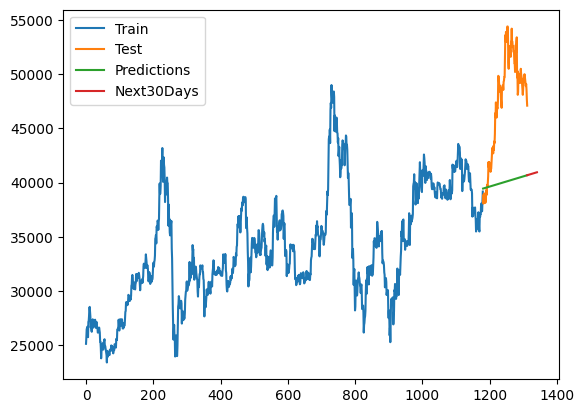

In [13]:
# 8.1. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

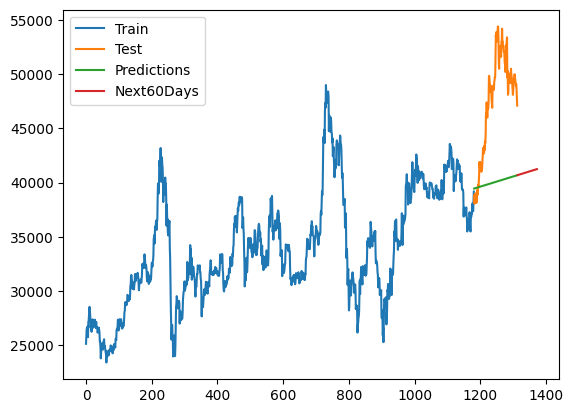

In [14]:
# 8.2. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Days'])
plt.show()

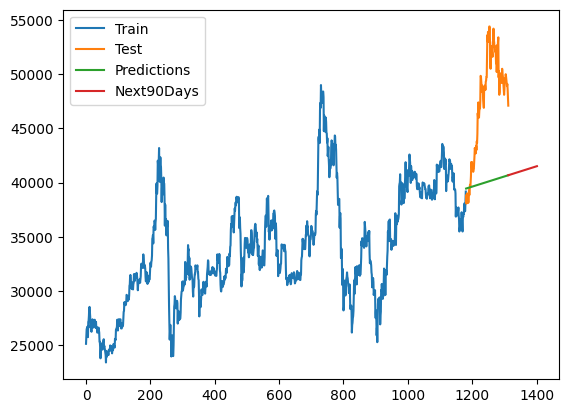

In [15]:
# 8.3. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Days'])
plt.show()